In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import statistics 

In [2]:
note = pd.read_json("../export_0.json")
note.loc[0]
note.loc[0].coaching
note.loc[0].player
note.loc[0].scores
note.loc[0].highlights

{'overwolf': {'good': [{'type': 'kda', 'message': 'You got top 4'}],
  'bad': []}}

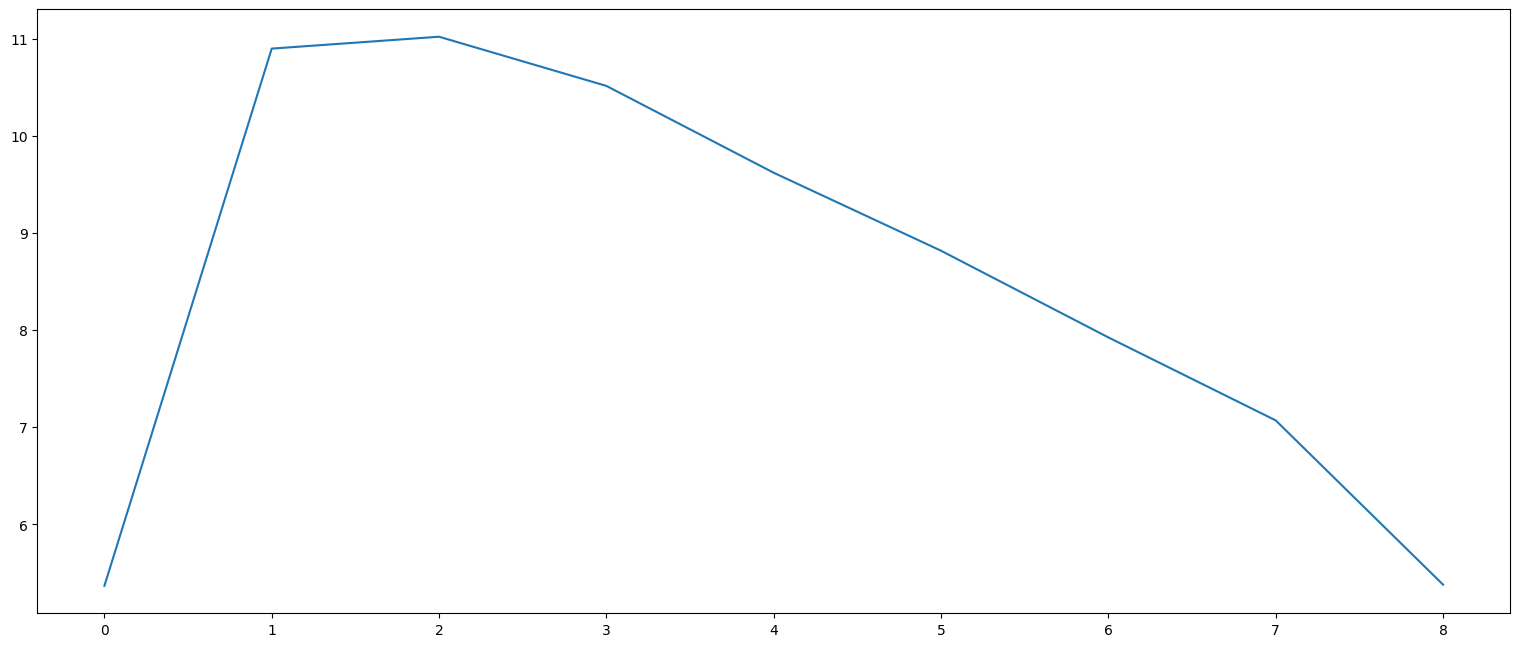

In [12]:
"""
Following functions returns a 2D array which includes details such as the maximum, minimum, average 
and standard deviation of the variables of interest categorised by final player rank
Contains functions: getGoldSummaryByRank, getRerollSummaryByRank, getUnitsBoughtSummaryByRank
"""

def getGoldSummaryByRank():
    """
    Returns a 2D array with summary statistics of total gold accumulated categorised by final player rank
    """
    placement_gold = {}
    for i in range(0, len(note)):
        if note.loc[i].player['final']['placement']['rank'] not in placement_gold.keys():
            placement_gold[note.loc[i].player['final']['placement']['rank']] = [note.loc[i].player['final']['gold_gained']]
        else:
            placement_gold[note.loc[i].player['final']['placement']['rank']].append(note.loc[i].player['final']['gold_gained'])
    
    summary_placement_gold = [["rank", "max", "min", "avg", "sd"]]
    for key in sorted(placement_gold.keys()):
        summary_placement_gold.append([int(key), max(placement_gold[key]), min(placement_gold[key]), 
                                       sum(placement_gold[key])/len(placement_gold[key]), 
                                       statistics.stdev(placement_gold[key])])    
    return summary_placement_gold

def getRerollSummaryByRank():
    """
    Returns a 2D array with summary statistics of total number of rerolls categorised by final player rank
    """
    placement_reroll = {}
    for i in range(0, len(note)):
        if note.loc[i].player['final']['placement']['rank'] not in placement_reroll.keys():
            placement_reroll[note.loc[i].player['final']['placement']['rank']] = [note.loc[i].player['rerolls']['total_rerolls']]
        else:
            placement_reroll[note.loc[i].player['final']['placement']['rank']].append(note.loc[i].player['rerolls']['total_rerolls'])
    
    summary_placement_reroll = [["rank", "max", "min", "avg", "sd"]]
    for key in sorted(placement_reroll.keys()):
        summary_placement_reroll.append([int(key), max(placement_reroll[key]), min(placement_reroll[key]), 
                                         sum(placement_reroll[key])/len(placement_reroll[key]), 
                                         statistics.stdev(placement_reroll[key])])    
    return summary_placement_reroll

def getUnitsBoughtSummaryByRank():
    """
    Returns a 2D array with summary statistics of total units bought categorised by final player rank
    """
    placement_units_bought = {}
    total = 0
    for key, value in note.loc[1].player['store']['total']['units_bought']['unit_bought'].items():
        total += value
        
    for i in range(0, len(note)):
        if note.loc[i].player['final']['placement']['rank'] not in placement_units_bought.keys():
            total_units_bought = 0
            for key, value in note.loc[i].player['store']['total']['units_bought']['unit_bought'].items():
                total_units_bought += value
            placement_units_bought[note.loc[i].player['final']['placement']['rank']] = [total_units_bought]
        else:
            total_units_bought = 0
            for key, value in note.loc[i].player['store']['total']['units_bought']['unit_bought'].items():
                total_units_bought += value
            placement_units_bought[note.loc[i].player['final']['placement']['rank']].append(total_units_bought)
   
    summary_placement_units_bought = [["rank", "max", "min", "avg", "sd"]]
    for key in sorted(placement_units_bought.keys()):
        summary_placement_units_bought.append([key, max(placement_units_bought[key]), min(placement_units_bought[key]), 
                                               sum(placement_units_bought[key])/len(placement_units_bought[key]), 
                                               statistics.stdev(placement_units_bought[key])])
    return summary_placement_units_bought

def getItemSummaryByRank():
    """
    Returns a 2D array with summary statistics of total number of items on champions categorised by final player rank
    """
    placement_items = {}
    for i in range(0, len(note)):
        if note.loc[i].player['final']['placement']['rank'] not in placement_items.keys():
            total_items = 0
            for value in note.loc[i].player['final']['comp']:
                total_items += len(value['items'])
            placement_items[note.loc[i].player['final']['placement']['rank']] = [total_items]
        else:
            total_items = 0
            for value in note.loc[i].player['final']['comp']:
                total_items += len(value['items'])
            placement_items[note.loc[i].player['final']['placement']['rank']].append(total_items)

    summary_placement_item = [["rank", "max", "min", "avg", "sd"]]
    avg_placement_item = []
    for key in sorted(placement_items.keys()):
        summary_placement_item.append([int(key), max(placement_items[key]), min(placement_items[key]), 
                                         sum(placement_items[key])/len(placement_items[key]), 
                                         statistics.stdev(placement_items[key])])
        avg_placement_item.append(sum(placement_items[key])/len(placement_items[key]))
    
    return summary_placement_item

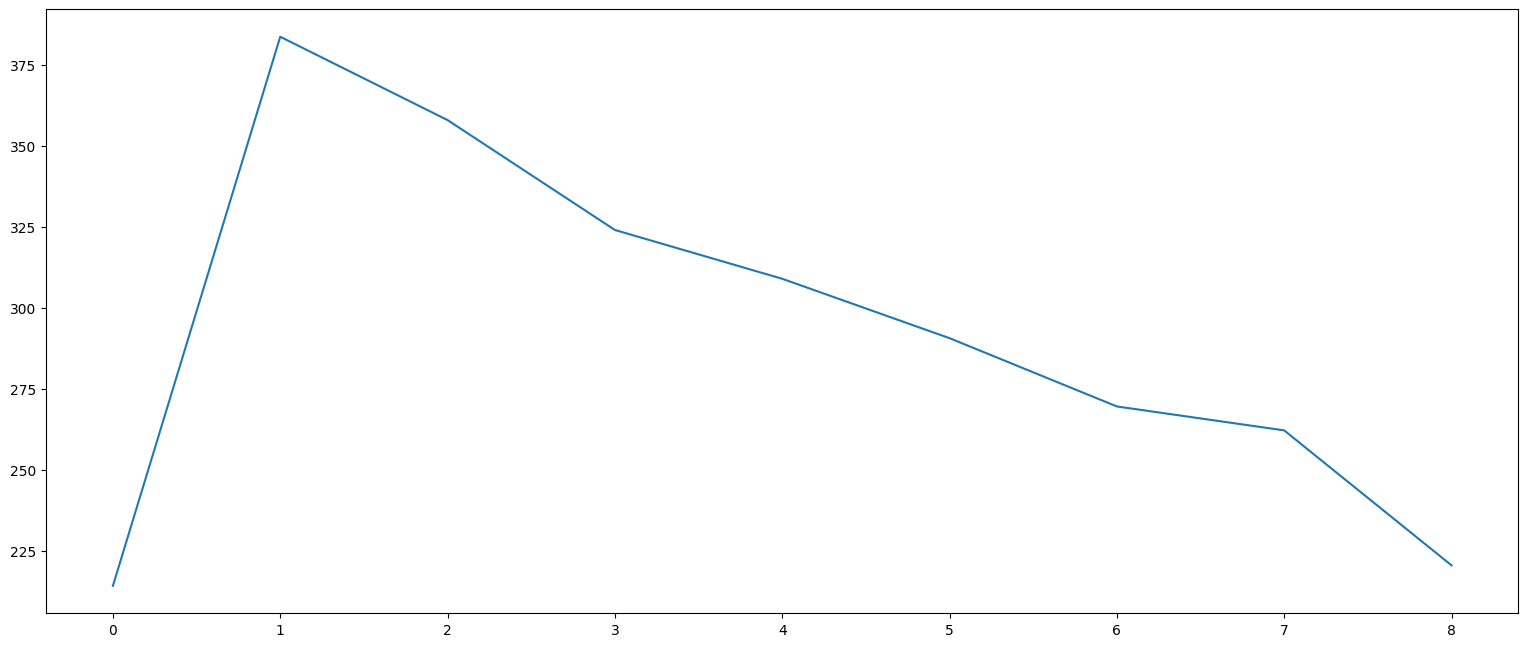

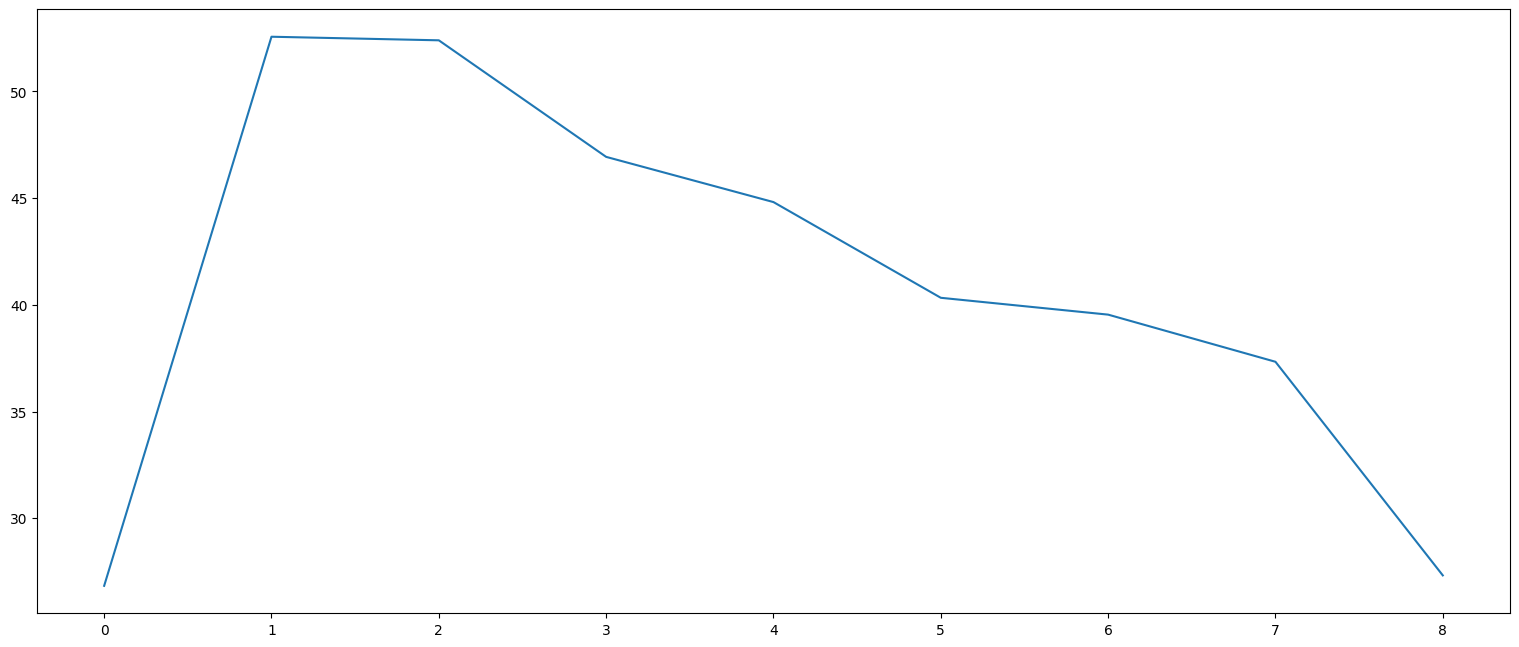

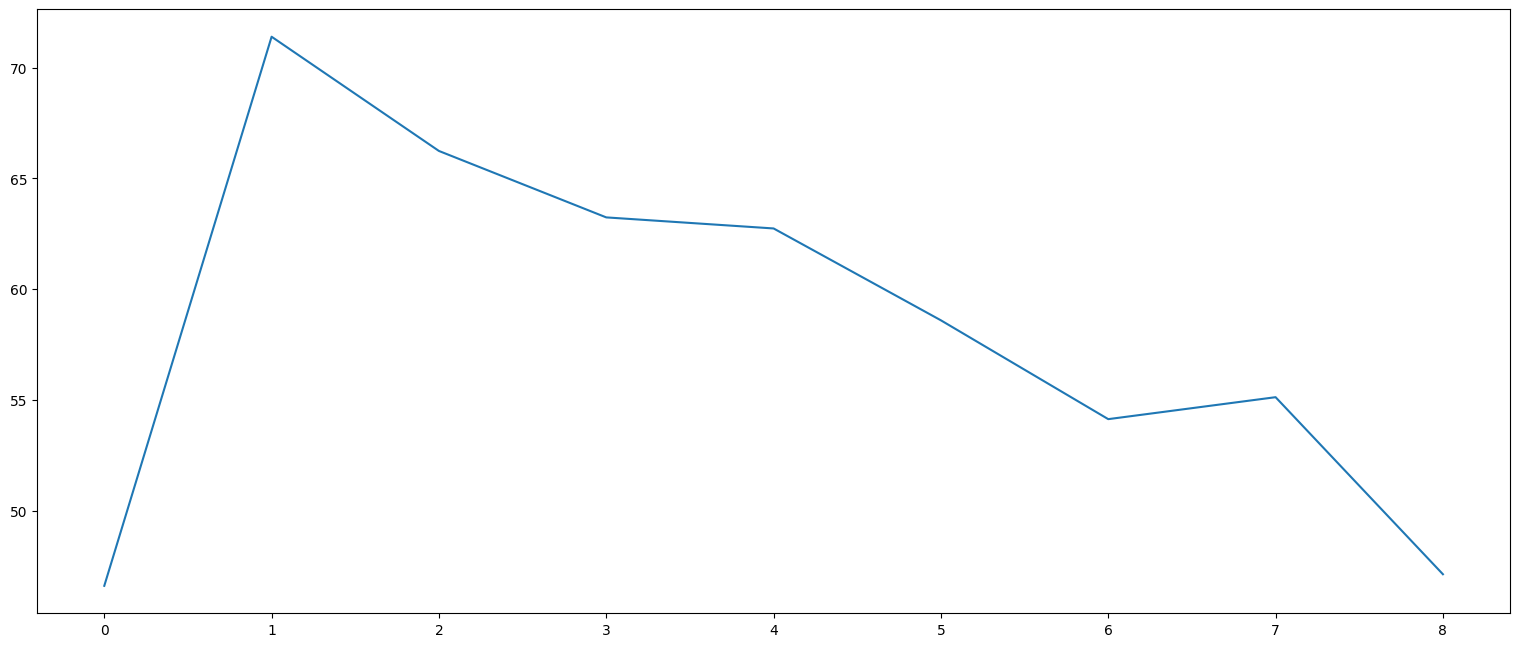

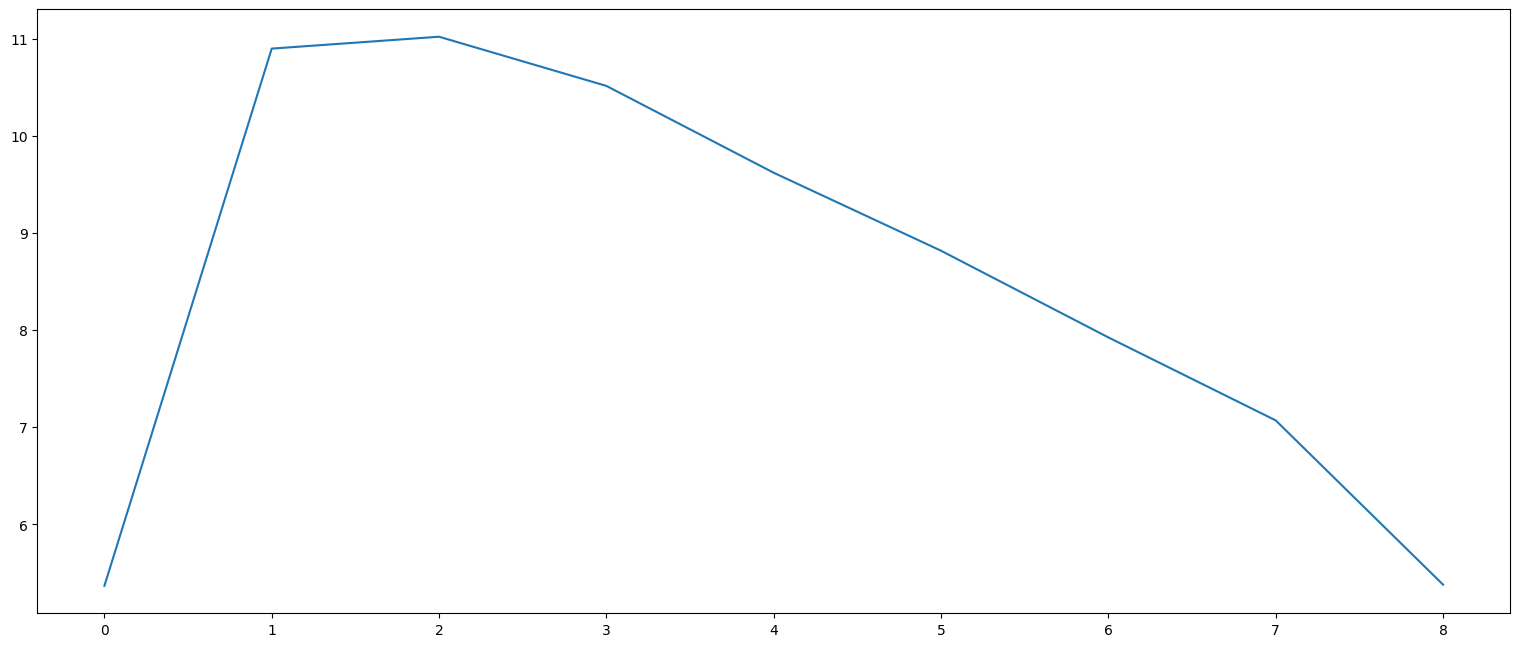

In [15]:
# Generate graphs for the variable summaries categorised by rank
x = [0, 1, 2, 3, 4, 5, 6, 7, 8]

# Gold Summary Graph
result = getGoldSummaryByRank()
y = []
for item in result:
    y.append(item[3])
y.remove('avg')

plt.figure(figsize=(19,8), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(x,y)

# Reroll Summary
result = getRerollSummaryByRank()
y = []
for item in result:
    y.append(item[3])
y.remove('avg')

plt.figure(figsize=(19,8), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(x,y)

# Units Bought Summary
result = getUnitsBoughtSummaryByRank()
y = []
for item in result:
    y.append(item[3])
y.remove('avg')

plt.figure(figsize=(19,8), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(x,y)

# Items Used Summary
result = getItemSummaryByRank()
y = []
for item in result:
    y.append(item[3])
y.remove('avg')

plt.figure(figsize=(19,8), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(x,y)

In [5]:
def getHealthSummaryByRound():
    """
    Returns a 2D array with summary statistics of total health remaining categorised by round
    """
    round_health = {}
    for i in range(0, len(note)):
        for item in note.loc[i].player['health']['by_round']:
            current_round = item['current_round']
            health = item['health']
            if current_round not in round_health.keys():
                round_health[current_round] = [int(health)]
            else:
                round_health[current_round].append(int(health))

    summary_round_health = [["round", "max", "min", "avg", "sd"]]
    for key in sorted(round_health.keys()):
        summary_round_health.append([key, max(round_health[key]), min(round_health[key]), 
                                       sum(round_health[key])/len(round_health[key]), 
                                       statistics.stdev(round_health[key])])  
    return summary_round_health

def getGoldSummaryByRound():
    """
    Returns a 2D array with summary statistics of total gold accumulated categorised by round
    """
    round_gold = {}
    for i in range(0, len(note)):
        player = {}
        for item in note.loc[i].player['gold']['by_round']:
            current_round = item['current_round']
            gold = item['gold']
            if current_round not in player.keys():
                player[current_round] = int(gold)
            else:
                # only obtain the final accumulated gold at the end of the round
                player[current_round] = int(gold)
        
        for key, value in player.items():
            if key not in round_gold.keys():
                round_gold[key] = [value]
            else:
                round_gold[key].append(value)
    
    summary_round_gold = [["round", "max", "min", "avg", "sd"]]
    for key in sorted(round_gold.keys()):
        stdev = 'N/A'
        if (len(round_gold[key])) > 2:
            stdev = statistics.stdev(round_gold[key])
        maximum = max(round_gold[key])
        minimum = min(round_gold[key])
        summary_round_gold.append([key, maximum, minimum, sum(round_gold[key])/len(round_gold[key]), stdev])  
    return summary_round_gold

def getRerollSummaryByRound():
    """
    Returns a 2D array with summary statistics of total number of rerolls accumulated categorised by round
    """
    round_reroll = {}
    for i in range(0, len(note)):
        for key, value in note.loc[i].player['rerolls']['by_round'].items():
            if key not in round_reroll.keys():
                round_reroll[key] = [int(value)]
            else:
                round_reroll[key].append(value)
                
#     print(round_reroll)

    summary_round_reroll = [["round", "max", "min", "avg", "sd"]]
    for key in sorted(round_reroll.keys()):
        stdev = 'N/A'
        if (len(round_reroll[key])) > 2:
            stdev = statistics.stdev(round_reroll[key])
        maximum = max(round_reroll[key])
        minimum = min(round_reroll[key])
        summary_round_reroll.append([key, maximum, minimum, sum(round_reroll[key])/len(round_reroll[key]), stdev])  
    return summary_round_reroll

result1 = getHealthSummaryByRound()
result2 = getGoldSummaryByRound()
result3 = getRerollSummaryByRound()

for item in result:
    print(item)
    


['round', 'max', 'min', 'avg', 'sd']
['1-0', 0, 0, 0.0, 'N/A']
['1-1', 0, 0, 0.0, 0.0]
['1-3', 6, 0, 0.28975265017667845, 0.4786776708021157]
['1-4', 7, 0, 0.2818043588443994, 0.48784244563791357]
['2-1', 12, 0, 0.34157416750756814, 0.6077715971352972]
['2-2', 13, 0, 0.363773965691221, 0.6293827536154178]
['2-3', 8, 0, 0.4272040302267002, 0.7336012936522571]
['2-4', 14, 0, 0.5378787878787878, 0.9772963631155152]
['2-5', 1, 0, 0.5, 'N/A']
['2-6', 14, 0, 0.5763993948562783, 1.057426643220116]
['2-7', 14, 0, 0.4027286508337544, 0.7216237116644302]
['3-1', 20, 0, 1.0115985879979827, 2.163910626395944]
['3-2', 17, 0, 0.9682139253279516, 1.6826755510927112]
['3-3', 15, 0, 1.083417593528817, 1.636896915174969]
['3-4', 28, 0, 1.3129113924050633, 1.926541115168973]
['3-5', 0, 0, 0.0, 'N/A']
['3-6', 22, 0, 1.549089068825911, 2.2215558877033255]
['3-7', 17, 0, 0.8537206931702345, 1.4269600955166075]
['4-1', 29, 0, 2.0760649087221097, 2.7860082265679247]
['4-2', 25, 0, 2.3728382502543237, 2.887871

In [37]:
def traitRankedDesirability():
    """
    Returns a 2D array with the most desirable traits categorised by final rank
    """
    placement_traits = {}
    for i in range(0, len(note)):
        rank = note.loc[i].player['final']['placement']['rank']
        for key, value in note.loc[i].player['final']['traits'].items():
            if rank not in placement_traits.keys():
                placement_traits[rank] = {key: value}
            else:
                add = placement_traits[rank]
                if key in placement_traits[rank].keys():
                    placement_traits[rank][key] += value
                else:
                    placement_traits[rank][key] = value

    ranked_traits = [["rank", "trait", "occurences"]] 
    for key in sorted(placement_traits.keys()):
        popular_trait = "" 
        maximum = 0
        for trait, value in placement_traits[key].items():
            if (value > maximum):
                maximum = value
                popular_trait = trait
        ranked_traits.append([key, popular_trait, maximum])
    
    return ranked_traits

result = traitRankedDesirability()
for item in result:
    print(item)

['rank', 'trait', 'occurences']
['0', 'Set3_Blademaster', 30]
['1', 'Chrono', 354]
['2', 'Chrono', 344]
['3', 'Chrono', 322]
['4', 'Chrono', 314]
['5', 'Chrono', 276]
['6', 'Chrono', 263]
['7', 'Chrono', 209]
['8', 'Vanguard', 211]


In [38]:
"""
WIP - trying to make strings become a dictionary reference 
"""
def getGoldByRank(variable, rank):
    print(variable)
    variable.replace('"', "")
    print(variable)
    print(note.loc[0].variable)
#     placement_gold = {}
#     for i in range(0, len(note)):
#         if note.loc[i].player['final']['placement']['rank'] not in placement_gold.keys():
#             placement_gold[note.loc[i].player['final']['placement']['rank']] = [note.loc[i].player['final']['gold_gained']]
#         else:
#             placement_gold[note.loc[i].player['final']['placement']['rank']].append(note.loc[i].player['final']['gold_gained'])

#     # print(placement_gold)
    
#     summary_placement_gold = [["rank", "max", "min", "avg", "sd"]]
#     for key in sorted(placement_gold.keys()):
#         summary_placement_gold.append([int(key), max(placement_gold[key]), min(placement_gold[key]), sum(placement_gold[key])/len(placement_gold[key]), statistics.stdev(placement_gold[key])])
# #         print (key, max(placement_gold[key]), min(placement_gold[key]), sum(placement_gold[key])/len(placement_gold[key]), statistics.stdev(placement_gold[key]))
    
#     print (summary_placement_gold)
    
# result = getGoldByRank("player['final']['gold_gained']", "player['final']['placement']['rank']")